# Create average faces

One average face for each of the Fortune 100 companies

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from facer import facer
import os

# Pipeline
For each company:
  1. Load the saved images
  2. Combine the faces
  3. Save the average face

In [19]:
fortune = pd.read_csv("./Fortune100.csv").set_index("RANK")
fortune.head(2)

,NAME,REVENUES ($M),REVENUE PERCENT CHANGE,PROFITS ($M),PROFITS PERCENT CHANGE,ASSETS ($M),"MARKET VALUE — AS OF MARCH 29, 2019 ($M)",CHANGE IN RANK (FULL 1000),EMPLOYEES,CHANGE IN RANK (500 ONLY),URL_FORBES,URL_COMPANY,SEARCH_URL,URL_COMPANY_SUFFIX,URL_LEADERSHIP,URL_LEADERSHIP_ROOT,URL_DOMAIN
RANK,,,,,,,,,,,,,,,,,
1,Walmart,"$514,405.0",2.8%,"$6,670.0",-32.4%,"$219,295.0","$279,880.3",-,"2,200,000",-,https://fortune.com/fortune500/2019/walmart,http://www.walmart.com,https://www.google.com/search?q=Walmart+corpor...,walmart.com,https://corporate.walmart.com/our-story/leader...,https://corporate.walmart.com,.com
2,Exxon Mobil,"$290,212.0",18.8%,"$20,840.0",5.7%,"$346,196.0","$342,172.0",-,"71,000",-,https://fortune.com/fortune500/2019/exxon-mobil,http://www.exxonmobil.com,https://www.google.com/search?q=Exxon Mobil+co...,exxonmobil.com,https://corporate.exxonmobil.com/company/who-w...,https://corporate.exxonmobil.com,.com


## Load the images

In [22]:
rank = 1
company = fortune.loc[rank, "NAME"]
folder = f"./images/{rank:02.0f}_{company}/"
folder

'./images/01_Walmart/'

In [9]:
images = facer.load_images(folder, verbose=True)


Found 54 in './images/01_Walmart/'.
(1 / 54): ./images/01_Walmart/Walmart_image_08.jpg
(6 / 54): ./images/01_Walmart/Walmart_image_09.jpg
(11 / 54): ./images/01_Walmart/Walmart_image_32.jpg
(16 / 54): ./images/01_Walmart/Walmart_image_31.jpg
(21 / 54): ./images/01_Walmart/Walmart_image_43.jpg
(26 / 54): ./images/01_Walmart/Walmart_image_45.jpg
(31 / 54): ./images/01_Walmart/Walmart_image_53.jpg
(36 / 54): ./images/01_Walmart/Walmart_image_15.jpg
(41 / 54): ./images/01_Walmart/Walmart_image_03.jpg
(46 / 54): ./images/01_Walmart/Walmart_image_06.jpg
(51 / 54): ./images/01_Walmart/Walmart_image_00_bad_size.jpg


In [10]:
# Detect landmarks for each face
landmarks, faces = facer.detect_face_landmarks(images, verbose=True)


Starting face landmark detection...
Processing 54 images.
(1 / 54): ./images/01_Walmart/Walmart_image_08.jpg
(6 / 54): ./images/01_Walmart/Walmart_image_09.jpg
(11 / 54): ./images/01_Walmart/Walmart_image_32.jpg
(16 / 54): ./images/01_Walmart/Walmart_image_31.jpg
(21 / 54): ./images/01_Walmart/Walmart_image_43.jpg
(26 / 54): ./images/01_Walmart/Walmart_image_45.jpg
(31 / 54): ./images/01_Walmart/Walmart_image_53.jpg
(36 / 54): ./images/01_Walmart/Walmart_image_15.jpg
(41 / 54): ./images/01_Walmart/Walmart_image_03.jpg
(46 / 54): ./images/01_Walmart/Walmart_image_06.jpg
(51 / 54): ./images/01_Walmart/Walmart_image_00_bad_size.jpg
Skipped 3.7% of images.



Starting face averaging for 52 faces.
Image 1 / 52
Image 4 / 52
Image 7 / 52
Image 10 / 52
Image 13 / 52
Image 16 / 52
Image 19 / 52
Image 22 / 52
Image 25 / 52
Image 28 / 52
Image 31 / 52
Image 34 / 52
Image 37 / 52
Image 40 / 52
Image 43 / 52
Image 46 / 52
Image 49 / 52
Image 52 / 52
Done.


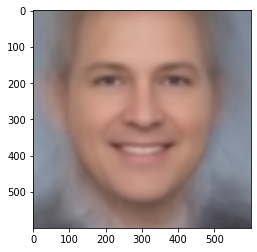

CPU times: user 1min 59s, sys: 4.67 s, total: 2min 4s
Wall time: 2min 9s


In [29]:
%%time
# Use  the detected landmarks to create an average face
fp = os.path.join("average_faces", f"average_face_{rank:02.0f}_{company}.jpg")
average_face = facer.create_average_face(faces, landmarks, output_file=fp, save_image=True)

# View the composite image
plt.imshow(average_face)
title = f"{company}, Forbes rank: #{rank:02.0f}\n(Combined {len(faces)} images)"
plt.title(title)
plt.show()

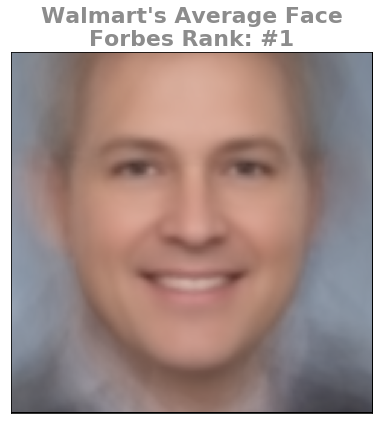

In [44]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(average_face)
title = f"{company}'s Average Face\nForbes Rank: #{rank}"
kwargs = {"fontsize": 22, "fontweight": "heavy", "color": "gray", "alpha":0.9}
ax.set_title(title, **kwargs)
ax.set(**{"xlabel": '', "ylabel": '', "xticks": [], "yticks": []})
plt.tight_layout()
plt.show()